<a href="https://colab.research.google.com/github/lucasjsgoncalves/cluster_clients_and_products/blob/main/Projeto_de_Clusteriza%C3%A7%C3%A3o_de_Clientes_e_Produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
#Importando as bibliotecas que vão ser necessárias dentro do nosso projeto.

In [ ]:
drive.mount('/content/drive') #Conectando ao meu drive.

Mounted at /content/drive


#Tabela

In [ ]:
tabela = pd.read_csv('/content/drive/MyDrive/DATA/projeto_clusterizacao/OnlineRetail.csv', encoding= 'latin1') #Importando minha tabela para o meu DataFrame.

In [ ]:
#Analisando as colunas que eu possuo no meu DataFrame, quantidade de informações e o tipo de dados da base.
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Analisando os formatos dos dados.
tabela

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
  # #Tirando a minha coluna de um formato de object e alterando para o datatime e na sequência removendo o horário que cada linha tem.
  # tabela['InvoiceDate'] = pd.to_datetime(tabela['InvoiceDate'],format='%d-%m-%Y %H:%M')
  # tabela['InvoiceDate'] = tabela['InvoiceDate'].dt.date
  # tabela.info()

In [ ]:
tabela.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
tabela['InvoiceDate'] = pd.to_datetime(tabela['InvoiceDate'], format='%d-%m-%Y %H:%M').dt.normalize()
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
 #Criando uma nova variável onde vai se chamar 'total, que é a quantidade vezes o preço, assim se o cliente comprou dois produtos, eu vou ter o valor total que ele gastou na compra.
tabela['Total'] = round(tabela['Quantity'] * tabela['UnitPrice'],3)

In [ ]:
#Consultando a nova variável no meu dataFrame
tabela.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,54.08


In [ ]:
 #Verificando se dentro do meu DataFrame tem valores ausentes e identificamos que as colunas Description e CustomerID possui valores ausentes/missing.
tabela.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Total,0


In [ ]:
# Definindo a data de referência para cálculo da recência (No caso eu defini a última data do meu dataFrame)
data_referencia = pd.Timestamp('2011-12-09')

# Cálculo da recência (dias desde a última compra)
recencia = tabela.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recencia['Recencia'] = (data_referencia - recencia['InvoiceDate']).dt.days

# Cálculo da frequência (número de compras)
frequencia = tabela.groupby('CustomerID').size().reset_index(name='Frequencia')

# Unindo os resultados
resultados = pd.merge(recencia[['CustomerID', 'Recencia']], frequencia, on='CustomerID')


print(resultados)

tabela = pd.merge(tabela, resultados, on='CustomerID', how='left')

#Então com esse resultado podemos dizer que o cliente 12346, tem a recência da última compra de 325 dias, ou seja, significa que ele fez a última compra há 325 dias. Isso pode dizer que o cliente está inativo ou fez compras muito esporádicas.
#Já o cliente 12347 fez compras há 2 dias atrás, o que indica que esse cliente está ativo.
#A frequencia indica que o cliente 12346 fez apenas duas compras no total, enquanto o cliente 12347 fez 182 compras, ou seja o cliente 02 é muito mais ativo, com uma padrão de compra frequente.

# Resumindo: Recência baixa e frequência alta (como no caso de CustomerID 12347) indica um cliente muito engajado e valioso, enquanto recência alta e frequência baixa (como no caso de CustomerID 12346) pode indicar um cliente que não está mais tão engajado
# ou até um cliente perdido (dependendo de outros fatores).

#Por fim guardando a variável resultados no meu dataFrame.

      CustomerID  Recencia  Frequencia
0        12346.0       325           2
1        12347.0         2         182
2        12348.0        75          31
3        12349.0        18          73
4        12350.0       310          17
...          ...       ...         ...
4367     18280.0       277          10
4368     18281.0       180           7
4369     18282.0         7          13
4370     18283.0         3         756
4371     18287.0        42          70

[4372 rows x 3 columns]


In [ ]:
#Criando uma tabela de clientes, somente com algumas informações especificas.
tabela_clientes = tabela.pivot_table(index='CustomerID', values='Total', aggfunc='sum')

In [ ]:
tabela_clientes.isna().sum()

,0
Total,0


In [ ]:
tabela

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Recencia,Frequencia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,302.0,312.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,302.0,312.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,302.0,312.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,302.0,312.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,302.0,312.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,0.0,52.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,0.0,52.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,0.0,52.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,0.0,52.0


#Tabela de Clientes

In [ ]:
# Calcular o total gasto por cliente
tabela['Total'] = tabela['Quantity'] * tabela['UnitPrice']
total_por_cliente = tabela.groupby('CustomerID')['Total'].sum().reset_index()

# Calcular a quantidade total de produtos comprados por cliente
quantidade_por_cliente = tabela.groupby('CustomerID')['Quantity'].sum().reset_index()

# Calcular o preço médio por produto para cada cliente
tabela['UnitPrice'] = tabela.groupby('CustomerID')['UnitPrice'].transform('mean')

# Contar o número de clientes por país
clientes_por_pais = tabela.groupby('Country')['CustomerID'].nunique().reset_index()

# Unir as métricas de Total, Frequência, Recência, Quantidade e Preço Médio
clientes_info = total_por_cliente \
    .merge(quantidade_por_cliente, on='CustomerID', how='left') \
    .merge(recencia, on='CustomerID', how='left') \
    .merge(tabela[['CustomerID', 'Country']].drop_duplicates(), on='CustomerID', how='left')

#Frequência ou quantidade de vezes que o cliente fez uma compra
transacoes_por_cliente = (tabela.groupby('CustomerID')['InvoiceNo'].nunique()).reset_index(name='Frequency')
transacoes_por_cliente['Frequency'] = transacoes_por_cliente['Frequency'].astype(float)
clientes_info = clientes_info.merge(transacoes_por_cliente, on='CustomerID', how='left')

# Valor médio por compra de cada cliente (Average Order Value (aov))
aov_por_cliente = (total_por_cliente['Total'] / transacoes_por_cliente['Frequency']).reset_index(name='AOV')
clientes_info['AOV'] = aov_por_cliente['AOV']

#Tamanho da Cesta
clientes_info = clientes_info.merge(tabela.groupby('CustomerID')['Quantity'].mean().reset_index(name='AvgBasketSize'), on='CustomerID', how='left')
# Renaming the 'AvgBasketSize' column to 'BasketSize'
clientes_info = clientes_info.rename(columns={'AvgBasketSize': 'BasketSize'})

# Preço médio por produto
clientes_info['UnitPrice'] = round(clientes_info['Total'] / clientes_info['Quantity'],2)
# Exibir a tabela final de clientes
clientes_info


,CustomerID,Total,Quantity,InvoiceDate,Recencia,Country,Frequency,AOV,BasketSize,UnitPrice
0,12346.0,0.00,0,2011-01-18,325,United Kingdom,2.0,0.000000,0.000000,NaN
1,12347.0,4310.00,2458,2011-12-07,2,Iceland,7.0,615.714286,13.505495,1.75
2,12348.0,1797.24,2341,2011-09-25,75,Finland,4.0,449.310000,75.516129,0.77
3,12349.0,1757.55,631,2011-11-21,18,Italy,1.0,1757.550000,8.643836,2.79
4,12350.0,334.40,197,2011-02-02,310,Norway,1.0,334.400000,11.588235,1.70
...,...,...,...,...,...,...,...,...,...,...
4375,18280.0,180.60,45,2011-03-07,277,United Kingdom,1.0,NaN,4.500000,4.01
4376,18281.0,80.82,54,2011-06-12,180,United Kingdom,1.0,NaN,7.714286,1.50
4377,18282.0,176.60,98,2011-12-02,7,United Kingdom,3.0,NaN,7.538462,1.80
4378,18283.0,2094.88,1397,2011-12-06,3,United Kingdom,16.0,NaN,1.847884,1.50


In [ ]:
clientes_info.isna().sum()

,0
CustomerID,0
Total,0
Quantity,0
InvoiceDate,0
Recencia,0
Country,0
Frequency,0
AOV,8
BasketSize,0
UnitPrice,6


In [ ]:
aov_por_cliente

,index,AOV
0,0,0.000000
1,1,615.714286
2,2,449.310000
3,3,1757.550000
4,4,334.400000
...,...,...
4367,4367,180.600000
4368,4368,80.820000
4369,4369,58.866667
4370,4370,130.930000


In [ ]:
clientes_info = clientes_info[clientes_info['Quantity'] > 0] #Quero enxergar somente os clientes com valores maiores que 0.
clientes_info = clientes_info[clientes_info['Frequency'] > 0]
clientes_info = clientes_info[clientes_info['Total'] > 0]
clientes_info = clientes_info[clientes_info['AOV'] > 0]


In [ ]:
clientes_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4268 entries, 1 to 4370
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4268 non-null   float64       
 1   Total        4268 non-null   float64       
 2   Quantity     4268 non-null   int64         
 3   InvoiceDate  4268 non-null   datetime64[ns]
 4   Recencia     4268 non-null   int64         
 5   Country      4268 non-null   object        
 6   Frequency    4268 non-null   float64       
 7   AOV          4268 non-null   float64       
 8   BasketSize   4268 non-null   float64       
 9   UnitPrice    4268 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 366.8+ KB


In [ ]:
clientes_info.isna().sum()


,0
CustomerID,0
Total,0
Quantity,0
InvoiceDate,0
Recencia,0
Country,0
Frequency,0
AOV,0
BasketSize,0
UnitPrice,0


##Clusterização Clientes

In [ ]:
features =['Total', 'Quantity', 'Recencia','UnitPrice','Frequency','BasketSize','AOV']

In [ ]:
clusterizacao = KMeans(n_clusters=2)

In [ ]:
clusterizacao.fit(clientes_info[features].values)

KMeans(n_clusters=2)

In [ ]:
np.unique(clusterizacao.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([4261,    7]))

In [ ]:
clientes_info['Cluster'] = clusterizacao.labels_
clientes_info['Cluster'].value_counts()

,count
Cluster,
0,4261
1,7


In [ ]:
z = clientes_info['Total'].values
y = clientes_info['Quantity'].values
x = clientes_info['Recencia'].values

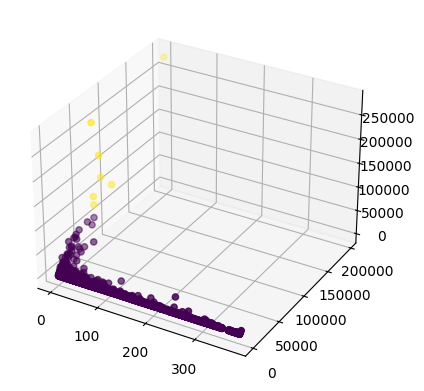

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusterizacao.labels_)

Contribuições das variáveis para os componentes principais:
        Total  Quantity  Recencia  UnitPrice  Frequency  BasketSize       AOV
PC1  0.878274  0.478154 -0.001411  -0.000009   0.000576    0.000893  0.000357
PC2 -0.478151  0.878249 -0.001527  -0.000336   0.000485    0.006862  0.001033


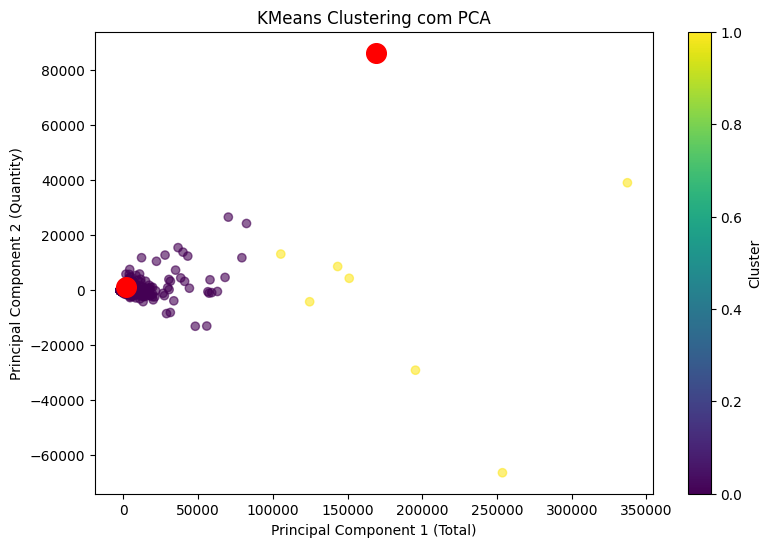

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clientes_info[features])

# Obtendo as contribuições das variáveis originais para os componentes principais
pca_components = pd.DataFrame(
    pca.components_,
    columns=features,
    index=['PC1', 'PC2']
)

print("Contribuições das variáveis para os componentes principais:")
print(pca_components)

# Identificando a variável com maior contribuição para cada componente
feature_pc1 = pca_components.loc['PC1'].idxmax()  # Variável com maior peso no PC1
feature_pc2 = pca_components.loc['PC2'].idxmax()  # Variável com maior peso no PC2

# Visualização dos clusters após PCA
plt.figure(figsize=(9, 6))
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=clientes_info['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.scatter(
    clusterizacao.cluster_centers_[:, 0],
    clusterizacao.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='o'
)
plt.title('KMeans Clustering com PCA')
plt.xlabel(f'Principal Component 1 ({feature_pc1})')  # Adiciona o nome da feature principal do PC1
plt.ylabel(f'Principal Component 2 ({feature_pc2})')  # Adiciona o nome da feature principal do PC2
plt.colorbar(label='Cluster')
plt.show()


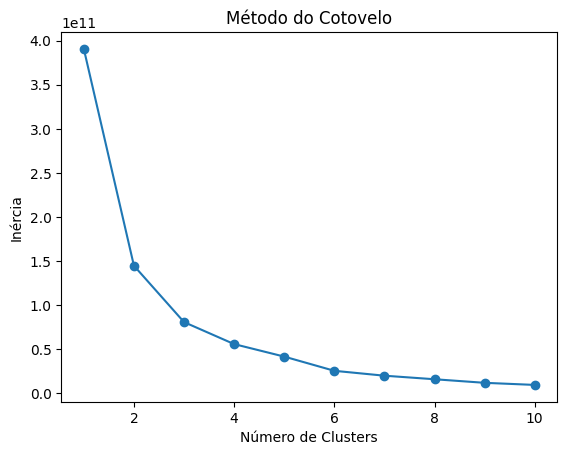

      CustomerID  Cluster
1        12347.0        0
2        12348.0        0
3        12349.0        0
4        12350.0        0
5        12352.0        0
...          ...      ...
4365     18265.0        0
4367     18269.0        0
4368     18270.0        0
4369     18272.0        0
4370     18273.0        0

[4268 rows x 2 columns]


In [ ]:
# Selecionando as variáveis para a clusterização
features = clientes_info[features]

# Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Após identificar o número ideal de clusters (suponhamos k=2 como exemplo)
kmeans = KMeans(n_clusters=2, random_state=42)
clientes_info['Cluster'] = kmeans.fit_predict(features)

# Visualizando a tabela com a coluna de Cluster
print(clientes_info[['CustomerID', 'Cluster']])


##Padronização Clientes

In [ ]:
scaler_features =['Total', 'Quantity', 'Recencia','UnitPrice','Frequency','BasketSize','AOV']

In [ ]:
padronizador = StandardScaler()
padro_features  = padronizador.fit_transform(clientes_info[scaler_features])

df_padronizado = pd.DataFrame(padro_features, columns=scaler_features, index=clientes_info.index)
tabela_clientes_padro = clientes_info.copy()
tabela_clientes_padro = df_padronizado
tabela_clientes_padro['CustomerID'] = clientes_info['CustomerID']

In [ ]:
tabela_clientes_padro

,Total,Quantity,Recencia,UnitPrice,Frequency,BasketSize,AOV,CustomerID
1,0.285584,0.279194,-0.887058,-0.030781,0.197748,-0.065218,0.834139,12347.0
2,-0.016719,0.254418,-0.151140,-0.061786,-0.120338,0.560000,0.361644,12348.0
3,-0.021493,-0.107696,-0.725761,0.002123,-0.438425,-0.114235,4.076317,12349.0
4,-0.192708,-0.199601,2.217910,-0.032363,-0.438425,-0.084549,0.035364,12350.0
5,-0.047015,-0.141790,-0.544302,0.017942,0.621863,-0.151505,-0.515228,12352.0
...,...,...,...,...,...,...,...,...
4365,-0.136512,-0.175461,-0.181384,-0.004521,-0.332396,-0.133220,-0.775539,18265.0
4367,-0.216228,-0.226495,2.701801,-0.023504,-0.332396,-0.113165,-0.401343,18269.0
4368,-0.204192,-0.220778,-0.524140,-0.008318,-0.226367,-0.126156,-0.684662,18270.0
4369,0.135775,0.191524,-0.887058,-0.038691,0.197748,-0.080160,-0.746998,18272.0


In [ ]:
clusterizacao_padro = KMeans(n_clusters=2)

In [ ]:
clusterizacao_padro.fit(tabela_clientes_padro[['Total', 'Quantity', 'Recencia']].values)

KMeans(n_clusters=2)

In [ ]:
np.unique(clusterizacao_padro.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([3209, 1059]))

In [ ]:
tabela_clientes_padro['Cluster'] = clusterizacao_padro.labels_
tabela_clientes_padro['Cluster'].value_counts()

,count
Cluster,
0,3209
1,1059


In [ ]:
x = tabela_clientes_padro['Total'].values
y = tabela_clientes_padro['Quantity'].values
z = tabela_clientes_padro['Recencia'].values

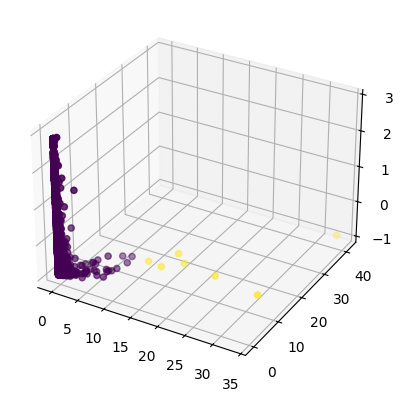

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusterizacao.labels_)

Contribuições das variáveis para os componentes principais:
        Total  Quantity  Recencia
PC1  0.693641  0.694061 -0.192719
PC2  0.138546  0.134000  0.981249


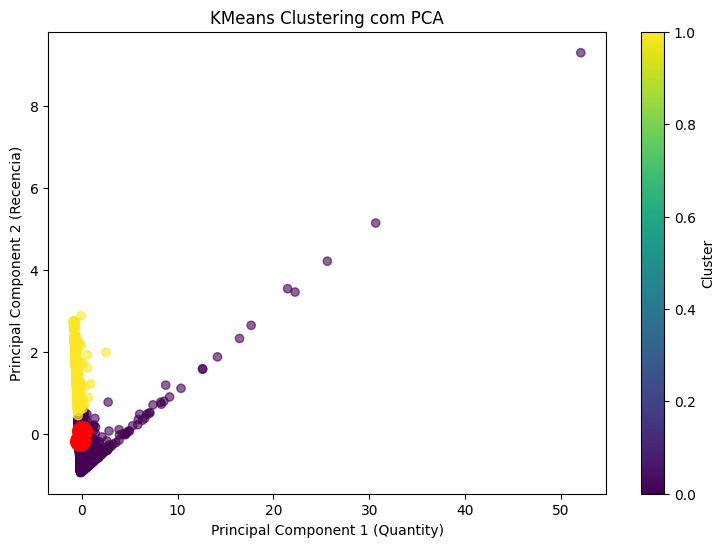

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tabela_clientes_padro[['Total', 'Quantity', 'Recencia']])

# Obtendo as contribuições das variáveis originais para os componentes principais
pca_components = pd.DataFrame(
    pca.components_,
    columns=['Total', 'Quantity', 'Recencia'],
    index=['PC1', 'PC2']
)

print("Contribuições das variáveis para os componentes principais:")
print(pca_components)

# Identificando a variável com maior contribuição para cada componente
feature_pc1 = pca_components.loc['PC1'].idxmax()  # Variável com maior peso no PC1
feature_pc2 = pca_components.loc['PC2'].idxmax()  # Variável com maior peso no PC2

# Visualização dos clusters após PCA
plt.figure(figsize=(9, 6))
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=tabela_clientes_padro['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.scatter(
    clusterizacao_padro.cluster_centers_[:, 0],
    clusterizacao_padro.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='o'
)
plt.title('KMeans Clustering com PCA')
plt.xlabel(f'Principal Component 1 ({feature_pc1})')  # Adiciona o nome da feature principal do PC1
plt.ylabel(f'Principal Component 2 ({feature_pc2})')  # Adiciona o nome da feature principal do PC2
plt.colorbar(label='Cluster')
plt.show()


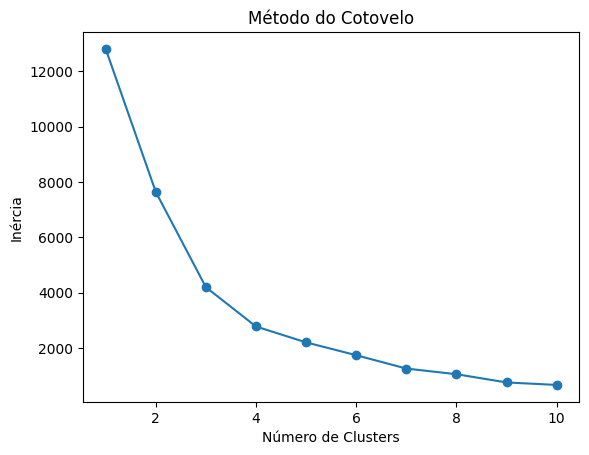

      CustomerID  Cluster
1        12347.0        0
2        12348.0        0
3        12349.0        0
4        12350.0        0
5        12352.0        0
...          ...      ...
4365     18265.0        0
4367     18269.0        0
4368     18270.0        0
4369     18272.0        0
4370     18273.0        0

[4268 rows x 2 columns]


In [ ]:
# Selecionando as variáveis para a clusterização
features_padro = tabela_clientes_padro[['Total', 'Quantity', 'Recencia']]

# Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_padro)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Após identificar o número ideal de clusters (suponhamos k=2 como exemplo)
kmeans = KMeans(n_clusters=2, random_state=42)
tabela_clientes_padro['Cluster'] = kmeans.fit_predict(features_padro)

# Visualizando a tabela com a coluna de Cluster
print(tabela_clientes_padro[['CustomerID', 'Cluster']])

## Conclusão Clientes
Após diversos testes, a configuração mais eficiente para criar clusters expressivos utilizou dados normalizados com as variáveis 'Total', 'Quantity' e 'Recência', definindo **dois clusters**. Embora o método do cotovelo sugerisse **três clusters**, a terceira divisão gerava um grupo pequeno, o que tornava a análise menos relevante. Assim, optou-se por **dois clusters**, garantindo um equilíbrio entre a separação dos grupos e a aplicabilidade prática.

No gráfico PCA, observa-se que o **cluster 1 (amarelo)** é composto por clientes com maior **recência** (entre 1 e 3), ou seja, compras realizadas mais recentemente, mas com uma quantidade total mais baixa (próxima de 0). Já o **cluster 0 (roxo)** inclui clientes com menor **recência** (próxima de 0), indicando compras feitas há mais tempo, mas com maior diversidade em termos de quantidade, este grupo ainda apresenta membros que compram em quantidade alta e recorrentemente mas em menores números, o valor total é um fator mais influente nesse grupo.

Embora existam diferenças claras, as centroides próximas indicam que os grupos compartilham algumas semelhanças de comportamento, especialmente em variáveis como quantidade. A escolha por **dois clusters** destacou-se como a mais prática, com a recência se mostrando a principal variável de distinção entre os grupos.

#Tabela Produtos

In [ ]:

# Criando um DataFrame onde cada linha representa um StockCode
tabela_produtos = tabela.groupby('StockCode').agg({'StockCode':'first', 'Description': 'first', 'Quantity': 'sum', 'UnitPrice': 'mean', 'Total': 'sum'})
tabela_produtos = tabela_produtos.reset_index(drop=True)

#Quantidade vendida em média por tranzação
tabela_produtos['AvgQuantityPerTransaction'] = round(tabela_produtos['Quantity'] / tabela_produtos['Total'],2)

#Valores Máximos e Mínimos
price_range = tabela.groupby('StockCode')['UnitPrice'].agg(['min', 'max']).reset_index()
tabela_produtos = tabela_produtos.merge(price_range, on='StockCode', how='left').rename(columns={'min': 'MinPrice', 'max': 'MaxPrice'})

#Em quantas compras cada produto aparece
frequencia_compra = tabela.groupby('StockCode')['Quantity'].count().reset_index(name='FrequenciaCompra')
tabela_produtos = tabela_produtos.merge(frequencia_compra, on='StockCode', how='left')

#Variação dos preços indicando produtos menos e mais voláteis
variabilidade_preco = tabela.groupby('StockCode')['UnitPrice'].std().reset_index(name='VariabilidadePreco')
tabela_produtos = tabela_produtos.merge(variabilidade_preco, on='StockCode', how='left')

#Participação nas vendas por produtos
total_vendas = tabela_produtos['Total'].sum()
tabela_produtos['ParticipacaoTotalVendas'] = (tabela_produtos['Total'] / total_vendas) * 100


#Retirando nulls
tabela_produtos = tabela_produtos.dropna()

# Exibindo o DataFrame
tabela_produtos

,StockCode,Description,Quantity,UnitPrice,Total,AvgQuantityPerTransaction,MinPrice,MaxPrice,FrequenciaCompra,VariabilidadePreco,ParticipacaoTotalVendas
0,10002,INFLATABLE POLITICAL GLOBE,1037,2.650848,759.890,1.36,0.895827,5.261843,73,0.862033,7.795544e-03
1,10080,GROOVY CACTUS INFLATABLE,495,2.497282,119.090,4.16,0.739420,5.995517,24,1.319003,1.221718e-03
2,10120,DOGGY RUBBER,193,2.631785,40.530,4.76,1.170323,14.018594,30,2.255153,4.157883e-04
3,10123C,HEARTS WRAPPING TAPE,-13,1.692756,3.250,-4.00,1.565976,1.879792,4,0.165358,3.334103e-05
5,10124A,SPOTS ON RED BOOKCOVER TAPE,16,2.451081,6.720,2.38,1.153051,4.765274,5,1.372820,6.893900e-05
...,...,...,...,...,...,...,...,...,...,...,...
4042,D,Discount,-1194,17.024590,-5696.220,0.21,1.513520,173.691739,77,36.022346,-5.843627e-02
4059,DOT,DOTCOM POSTAGE,1707,8.068707,206245.480,0.01,8.068707,8.068707,710,0.000000,2.115827e+00
4060,M,Manual,3164,53.638035,-68674.190,-0.05,0.425000,8055.780000,571,443.486131,-7.045134e-01
4061,PADS,PADS TO MATCH ALL CUSHIONS,4,3.480499,0.003,1333.33,2.578592,4.179400,4,0.732334,3.077634e-08


In [ ]:
tabela_produtos = tabela_produtos[tabela_produtos['Quantity'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['Total'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['AvgQuantityPerTransaction'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['MinPrice'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['MaxPrice'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['FrequenciaCompra'] > 0]
tabela_produtos = tabela_produtos[tabela_produtos['ParticipacaoTotalVendas'] > 0]

##Clusterização Produtos

In [ ]:
clusterizacao_produtos = KMeans(n_clusters=2)

In [ ]:
features_produtos = tabela_produtos[['Quantity', 'UnitPrice', 'Total','AvgQuantityPerTransaction',
        'MinPrice', 'MaxPrice','FrequenciaCompra','VariabilidadePreco','ParticipacaoTotalVendas']]

In [ ]:
# features_produtos = tabela_produtos[['Quantity', 'UnitPrice', 'Total'
#    ,'FrequenciaCompra','VariabilidadePreco']]

In [ ]:
features_produtos_list = ['Quantity', 'UnitPrice', 'Total',
       'AvgQuantityPerTransaction', 'MinPrice', 'MaxPrice','FrequenciaCompra','VariabilidadePreco','ParticipacaoTotalVendas']

In [ ]:
# features_produtos_list = ['Quantity', 'UnitPrice', 'Total'
#    ,'FrequenciaCompra','VariabilidadePreco']

In [ ]:
clusterizacao_produtos.fit(features_produtos)

KMeans(n_clusters=2)

In [ ]:
np.unique(clusterizacao.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([4261,    7]))

In [ ]:
tabela_produtos['Cluster'] = clusterizacao_produtos.labels_
tabela_produtos['Cluster'].value_counts()

,count
Cluster,
0,3268
1,119


In [ ]:
y = tabela_produtos['Total'].values
x = tabela_produtos['Quantity'].values
z =tabela_produtos['UnitPrice'].values

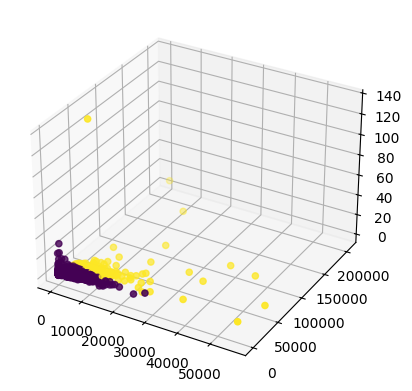

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusterizacao_produtos.labels_)

Contribuições das variáveis para os componentes principais:
     Quantity  UnitPrice    Total  AvgQuantityPerTransaction  MinPrice  \
PC1  0.278389   0.000040  0.96023                  -0.000036 -0.000007   
PC2  0.959942  -0.000139 -0.27889                   0.000087 -0.000089   

     MaxPrice  FrequenciaCompra  VariabilidadePreco  ParticipacaoTotalVendas  
PC1  0.003052          0.021188            0.000275                 0.000010  
PC2 -0.003029          0.026893           -0.000538                -0.000003  


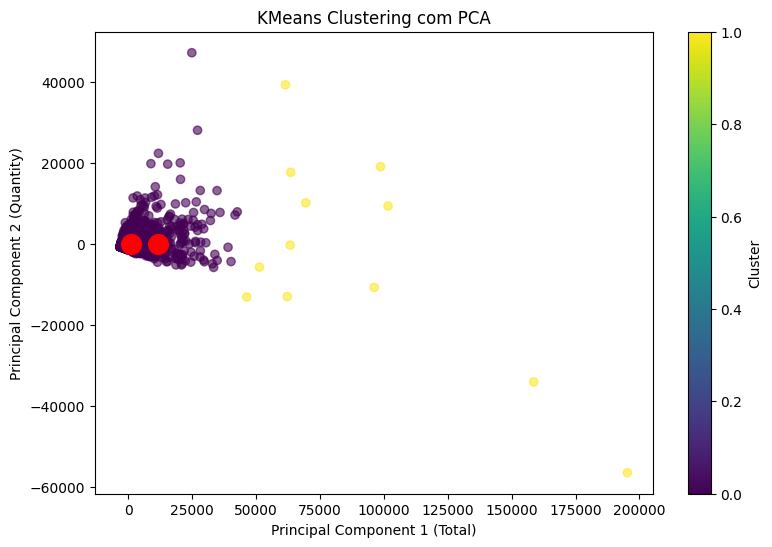

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tabela_produtos[features_produtos_list])

# Obtendo as contribuições das variáveis originais para os componentes principais
pca_components = pd.DataFrame(
    pca.components_,
    columns=features_produtos_list,
    index=['PC1', 'PC2']
)

print("Contribuições das variáveis para os componentes principais:")
print(pca_components)

# Identificando a variável com maior contribuição para cada componente
feature_pc1 = pca_components.loc['PC1'].idxmax()  # Variável com maior peso no PC1
feature_pc2 = pca_components.loc['PC2'].idxmax()  # Variável com maior peso no PC2

# Visualização dos clusters após PCA
plt.figure(figsize=(9, 6))
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=tabela_produtos['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.scatter(
    clusterizacao_produtos.cluster_centers_[:, 0],
    clusterizacao_produtos.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='o'
)
plt.title('KMeans Clustering com PCA')
plt.xlabel(f'Principal Component 1 ({feature_pc1})')  # Adiciona o nome da feature principal do PC1
plt.ylabel(f'Principal Component 2 ({feature_pc2})')  # Adiciona o nome da feature principal do PC2
plt.colorbar(label='Cluster')
plt.show()


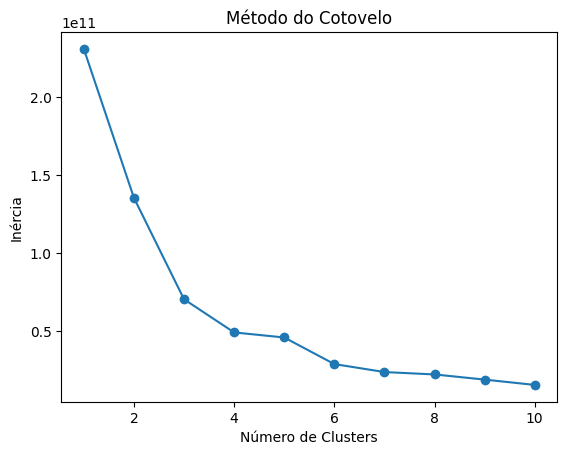

     StockCode  Cluster
0        10002        0
1        10080        0
2        10120        0
5       10124A        0
6       10124G        0
...        ...      ...
4035    90214Y        0
4040        C2        0
4059       DOT        1
4061      PADS        0
4062      POST        1

[3387 rows x 2 columns]


In [ ]:
# Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_produtos)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Após identificar o número ideal de clusters (suponhamos k=2 como exemplo)
kmeans = KMeans(n_clusters=2, random_state=42)
tabela_produtos['Cluster'] = kmeans.fit_predict(features_produtos)

# Visualizando a tabela com a coluna de Cluster
print(tabela_produtos[['StockCode', 'Cluster']])

##Padronização Produtos

In [ ]:
##Padronização Produtos
scaler_produtos = ['Quantity', 'UnitPrice', 'Total','AvgQuantityPerTransaction',
        'MinPrice', 'MaxPrice','FrequenciaCompra','VariabilidadePreco','ParticipacaoTotalVendas']
padronizador_produtos = StandardScaler()
padro_features_produtos = padronizador_produtos.fit_transform(tabela_produtos[scaler_produtos])

df_padronizado_produtos = pd.DataFrame(padro_features_produtos, columns=scaler_produtos, index=tabela_produtos.index)
tabela_produtos_padro = tabela_produtos.copy()
tabela_produtos_padro[scaler_produtos] = df_padronizado_produtos
tabela_produtos_padro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 0 to 4062
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StockCode                  3387 non-null   object 
 1   Description                3387 non-null   object 
 2   Quantity                   3387 non-null   float64
 3   UnitPrice                  3387 non-null   float64
 4   Total                      3387 non-null   float64
 5   AvgQuantityPerTransaction  3387 non-null   float64
 6   MinPrice                   3387 non-null   float64
 7   MaxPrice                   3387 non-null   float64
 8   FrequenciaCompra           3387 non-null   float64
 9   VariabilidadePreco         3387 non-null   float64
 10  ParticipacaoTotalVendas    3387 non-null   float64
 11  Cluster                    3387 non-null   int32  
dtypes: float64(9), int32(1), object(2)
memory usage: 330.8+ KB


In [ ]:
clusterizacao_produtos_padro = KMeans(n_clusters=2)

In [ ]:
clusterizacao_produtos_padro.fit(tabela_produtos_padro[scaler_produtos])

KMeans(n_clusters=2)

In [ ]:
np.unique(clusterizacao_produtos_padro.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([3235,  152]))

In [ ]:
tabela_produtos_padro['Cluster'] = clusterizacao_produtos_padro.labels_
tabela_produtos_padro['Cluster'].value_counts()

,count
Cluster,
0,3235
1,152


In [ ]:
y = tabela_produtos_padro['Total'].values
x = tabela_produtos_padro['Quantity'].values
z =tabela_produtos_padro['UnitPrice'].values

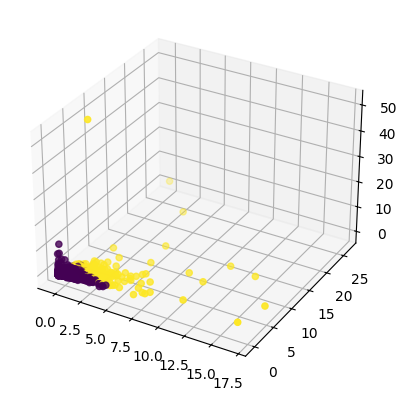

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusterizacao_produtos_padro.labels_)

Contribuições das variáveis para os componentes principais:
     Quantity  UnitPrice     Total  AvgQuantityPerTransaction  MinPrice  \
PC1  0.376989   0.262301  0.458823                  -0.009700 -0.100136   
PC2 -0.266144   0.507657 -0.209598                   0.003454  0.138053   

     MaxPrice  FrequenciaCompra  VariabilidadePreco  ParticipacaoTotalVendas  
PC1  0.304942          0.431313            0.280889                 0.458823  
PC2  0.483328         -0.270416            0.507728                -0.209598  


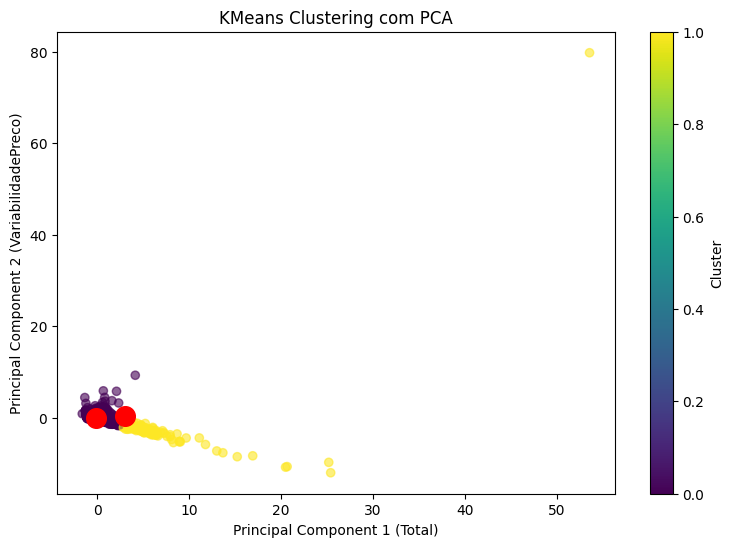

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tabela_produtos_padro[scaler_produtos])

# Obtendo as contribuições das variáveis originais para os componentes principais
pca_components = pd.DataFrame(
    pca.components_,
    columns=scaler_produtos,
    index=['PC1', 'PC2']
)

print("Contribuições das variáveis para os componentes principais:")
print(pca_components)

# Identificando a variável com maior contribuição para cada componente
feature_pc1 = pca_components.loc['PC1'].idxmax()  # Variável com maior peso no PC1
feature_pc2 = pca_components.loc['PC2'].idxmax()  # Variável com maior peso no PC2

# Visualização dos clusters após PCA
plt.figure(figsize=(9, 6))
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=tabela_produtos_padro['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.scatter(
    clusterizacao_produtos_padro.cluster_centers_[:, 0],
    clusterizacao_produtos_padro.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='o'
)
plt.title('KMeans Clustering com PCA')
plt.xlabel(f'Principal Component 1 ({feature_pc1})')  # Adiciona o nome da feature principal do PC1
plt.ylabel(f'Principal Component 2 ({feature_pc2})')  # Adiciona o nome da feature principal do PC2
plt.colorbar(label='Cluster')
plt.show()


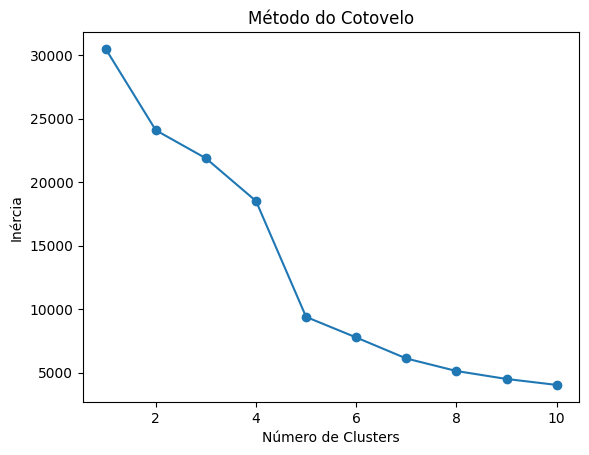

     StockCode  Cluster
0        10002        1
1        10080        1
2        10120        1
5       10124A        1
6       10124G        1
...        ...      ...
4035    90214Y        1
4040        C2        1
4059       DOT        0
4061      PADS        1
4062      POST        0

[3387 rows x 2 columns]


In [ ]:
# Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(padro_features_produtos)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Após identificar o número ideal de clusters (suponhamos k=2 como exemplo)
kmeans = KMeans(n_clusters=2, random_state=42)
tabela_produtos_padro['Cluster'] = kmeans.fit_predict(padro_features_produtos)

# Visualizando a tabela com a coluna de Cluster
print(tabela_produtos_padro[['StockCode', 'Cluster']])

##Conclusão Produtos
A clusterização realizada antes e após a normalização apresentou resultados semelhantes, indicando que a grande maioria dos produtos possui características muito similares em termos de valor total, quantidade vendida e outros indicadores. Esses produtos compõem o **Cluster 0**, representando a maior parte do conjunto analisado. Por outro lado, os produtos que se destacam por características atípicas, especialmente pelo valor total mais elevado, foram agrupados no **Cluster 1**, o que é observado em ambos os gráficos. O método do cotovelo se provou útil na clusterizão pré normalização, ja no segundo caso o número indicado de 4 ou 5 não foi ideal.